# Comparação entre as Probabilidades geradas por Monte Carlo e o Modelo Análitico do Sistema

## Preparação de Ambiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [2]:
M=64
n=50
r=4
p=1/M

results_filename = f"monte-carlo-simulation-results-{n}_{M}_{r}.csv"

In [3]:
monte_carlo_result_df = pd.read_csv('./../'+results_filename)

## Comparação do Modelo Analítico com Monte Carlo

### Modelo Analítico

#### Probabilidade dos Dispositivos Escolherem um Preâmbulo i

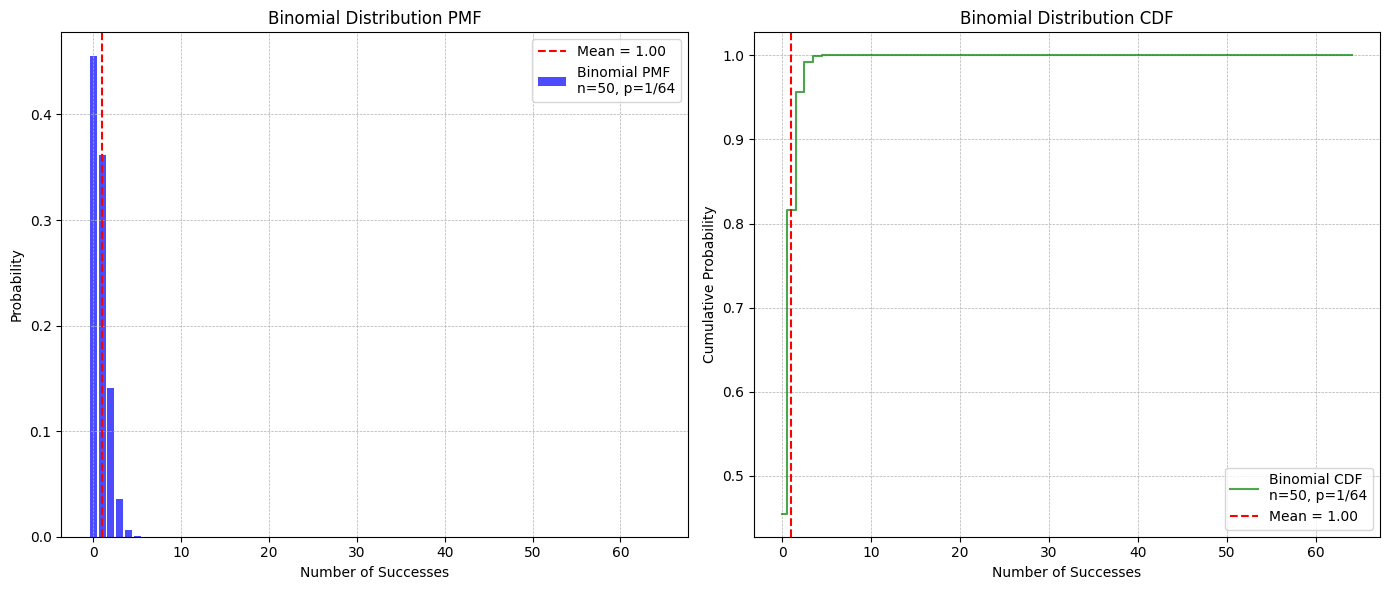

In [4]:
mean = binom.mean(M, p)

# Generate an array of all possible outcomes from 0 to n
k = np.arange(0, M+1)

# Calculate binomial probability mass function
pmf = binom.pmf(k, n, p)
# Calculate binomial cumulative distribution function
cdf = binom.cdf(k, n, p)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot PMF
ax1.bar(k, pmf, color='blue', alpha=0.7, label=f'Binomial PMF\nn={n}, p=1/{M}')
ax1.axvline(x=mean, color='red', linestyle='--', label=f'Mean = {mean:.2f}')
ax1.set_xlabel('Number of Successes')
ax1.set_ylabel('Probability')
ax1.set_title('Binomial Distribution PMF')
ax1.legend()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot CDF
ax2.step(k, cdf, where='mid', color='green', alpha=0.7, label=f'Binomial CDF\nn={n}, p=1/{M}')
ax2.axvline(x=mean, color='red', linestyle='--', label=f'Mean = {mean:.2f}')
ax2.set_xlabel('Number of Successes')
ax2.set_ylabel('Cumulative Probability')
ax2.set_title('Binomial Distribution CDF')
ax2.legend()
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

#### Probabilidade de Sucesso, Colisão, Esperança e Utilização

In [5]:
success_prob = binom.pmf(1, n, p)
transmission_prob = 1 - binom.pmf(0, n, p)
collision_prob = 1 - success_prob
utilization = transmission_prob * M
E = success_prob * M

print(f"Probabilidade de Transmissão: {transmission_prob:.4f}")
print(f"Probabilidade de Sucesso: {success_prob:.4f}")
print(f"Probabilidade de Colisão: {collision_prob:.4f}")
print(f"Utilização dos Preâmbulos: {utilization:.0f}")
print(f"Média de Transmissões Bem-Sucedidas: {E:.0f}")

Probabilidade de Transmissão: 0.5450
Probabilidade de Sucesso: 0.3611
Probabilidade de Colisão: 0.6389
Utilização dos Preâmbulos: 35
Média de Transmissões Bem-Sucedidas: 23


### Monte Carlo

#### Transmissões Bem-Sucedidas, Colisões e Utilização Por Round

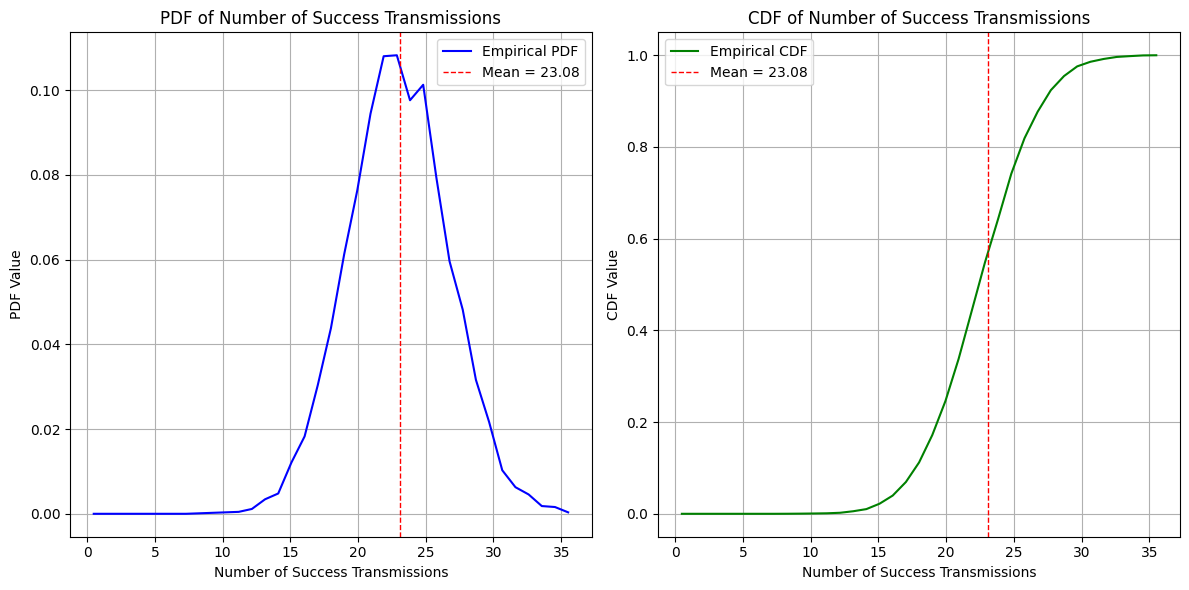

In [6]:
n_success_transmissions = monte_carlo_result_df['n-success-trans']

mean_value = n_success_transmissions.mean()

num_bins = int(n_success_transmissions.max()) + 1
hist, bins = np.histogram(n_success_transmissions, bins=num_bins, range=(0, num_bins-1), density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate CDF
cdf = np.cumsum(hist * np.diff(bins))

cdf = cdf / cdf[-1]

# Create plots with the same style as the analytical model
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist, label='Empirical PDF', color='blue')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean_value:.2f}')
plt.title('PDF of Number of Success Transmissions')
plt.xlabel('Number of Success Transmissions')
plt.ylabel('PDF Value')
plt.xticks(np.arange(0, num_bins, step=5))
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(bin_centers, cdf, label='Empirical CDF', color='green')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean_value:.2f}')
plt.title('CDF of Number of Success Transmissions')
plt.xlabel('Number of Success Transmissions')
plt.ylabel('CDF Value')
plt.xticks(np.arange(0, num_bins, step=5))
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

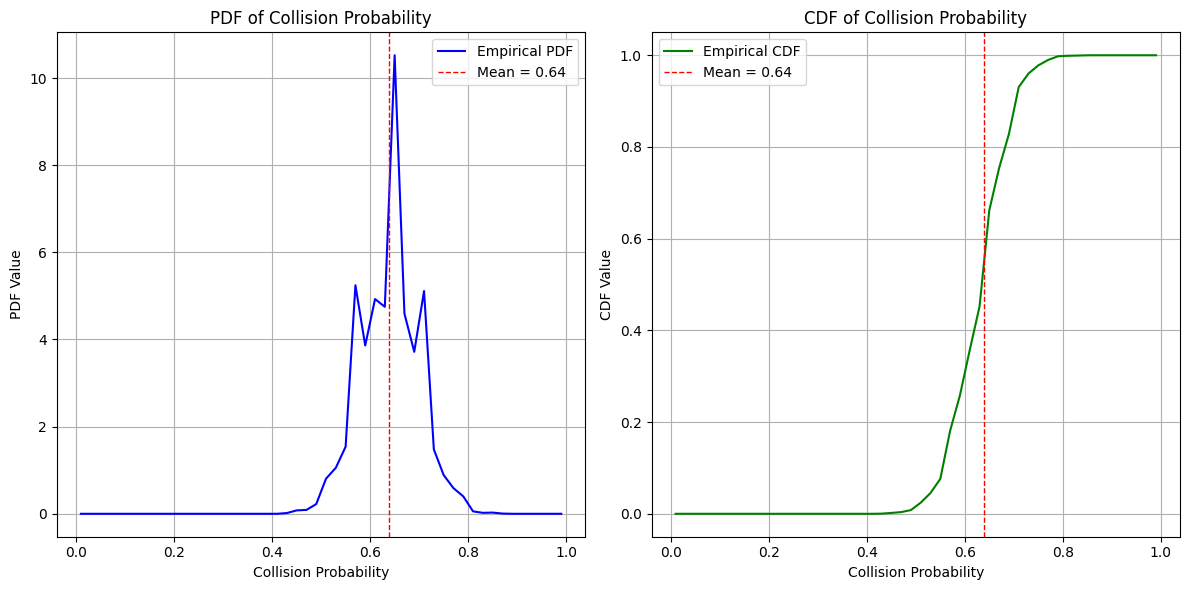

In [7]:
collision_probability = monte_carlo_result_df['collision-prob']

# Calculate the mean
mean_value = collision_probability.mean()

# Calculate histogram and bin edges for PDF
num_bins = 50
hist, bins = np.histogram(collision_probability, bins=num_bins, range=(0, 1), density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate CDF
cdf = np.cumsum(hist * np.diff(bins))

# Create plots
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist, label='Empirical PDF', color='blue')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean_value:.2f}')
plt.title('PDF of Collision Probability')
plt.xlabel('Collision Probability')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(bin_centers, cdf, label='Empirical CDF', color='green')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean_value:.2f}')
plt.title('CDF of Collision Probability')
plt.xlabel('Collision Probability')
plt.ylabel('CDF Value')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

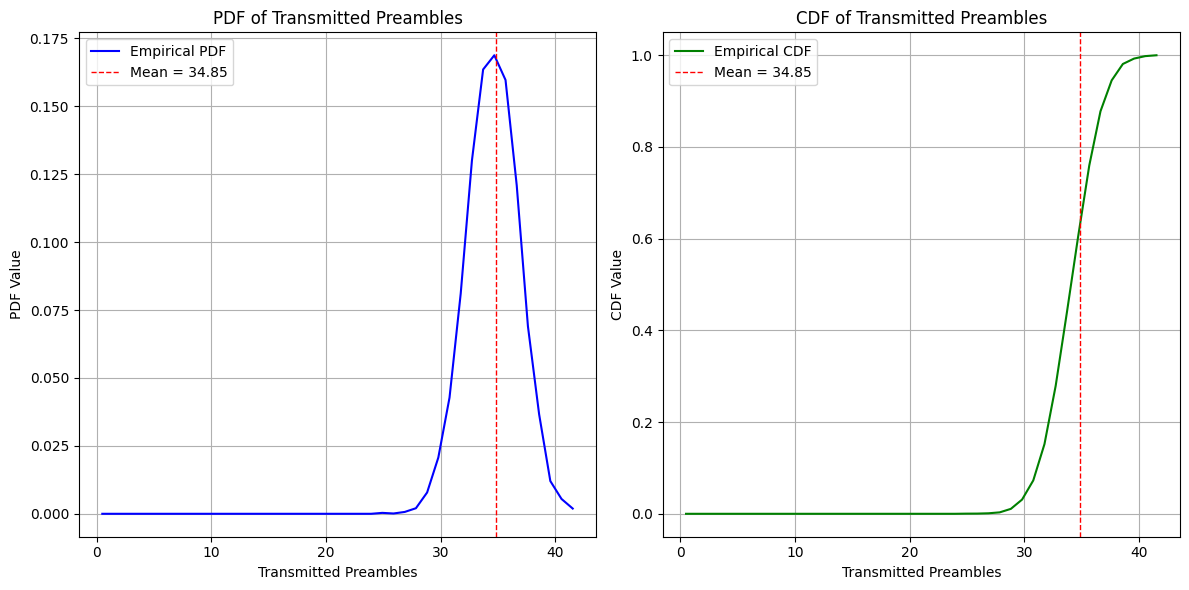

In [8]:
transmitted = monte_carlo_result_df['transmitted']

mean_value = transmitted.mean()

num_bins = int(transmitted.max()) + 1
hist, bins = np.histogram(transmitted, bins=num_bins, range=(0, num_bins-1), density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate CDF
cdf = np.cumsum(hist * np.diff(bins))

cdf = cdf / cdf[-1]

# Create plots
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(bin_centers, hist, label='Empirical PDF', color='blue')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean_value:.2f}')
plt.title('PDF of Transmitted Preambles')
plt.xlabel('Transmitted Preambles')
plt.ylabel('PDF Value')
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(bin_centers, cdf, label='Empirical CDF', color='green')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean_value:.2f}')
plt.title('CDF of Transmitted Preambles')
plt.xlabel('Transmitted Preambles')
plt.ylabel('CDF Value')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

#### Médias de Transmissões Bem-Suceddidas, Colisões e Utilização

In [9]:
collision_prob = monte_carlo_result_df['collision-prob'].mean()
success_prob = 1 - collision_prob
utilization = monte_carlo_result_df['transmitted'].mean() 
transmission_prob = utilization/M
E = monte_carlo_result_df['n-success-trans'].mean()

print(f"Probabilidade de Transmissão: {transmission_prob:.4f}")
print(f"Probabilidade de Sucesso: {success_prob:.4f}")
print(f"Probabilidade de Colisão: {collision_prob:.4f}")
print(f"Preâmbulos Utilizados: {utilization:.0f}")
print(f"Média de Transmissões Bem-Sucedidas: {E:.0f}")

Probabilidade de Transmissão: 0.5446
Probabilidade de Sucesso: 0.3607
Probabilidade de Colisão: 0.6393
Preâmbulos Utilizados: 35
Média de Transmissões Bem-Sucedidas: 23
